# Demonstration of Analyses for "Comparison of Structural and Metabolic Biomarkers of Neurodegeneration for Brain Age Prediction"

**Steps of Analysis:**\
1 - bias-correction\
2 - brain age prediction in cognitively normals (CN)\
2.1 - validation of brain age prediction in CN\
3 - brain age prediction in individuals with mild cognitive impairment (MCI)\
6 - generate cross-validated predictions for whole dataset\
4 - association with cognitive performance/neuropathology

Examplary demonstration for PET modality

In [1]:
from brain_age_main import main
modality = 'PET'

/opt/anaconda/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Bias-correction
Comparison of no bia-correction ('None'), correction with chronological age (CA, 'True'), and correction without CA ('False').

In [ ]:
main("bias correction", modality, rand_seed=0)

## Main brain age prediction in cognitively normal individuals from ADNI

First column: 17Networks_LH_VisCent_ExStr_1 (should be 'X17Networks_LH_VisCent_ExStr_1')
Last column: CAU-lh (should be 'CAU-lh)
12 individuals younger than 65 years discarded.
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  17 Outliers in test set:  11
Total participants:  438 Inside IQR of all regions:  411 
(27 participants discarded as outliers)
Outliers in train set:  17 Outliers in test set:  10
Total participants:  438 Inside IQR of all regions:  412 
(26 participants discarded as outliers)
Outliers in train set:  14 Outliers in test set:  12
Total participants:  438 Inside IQR of all regions:  416 
(22 participants discarded as outliers)
Outliers in train set:  15 Outliers in test set:  7
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  16 Outliers in test set:  12


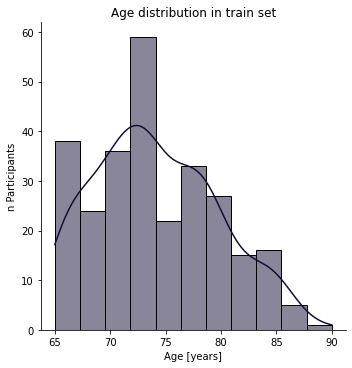

Cross-validating...
done.
Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.0080605713750086, R2: 0.7993409711619063


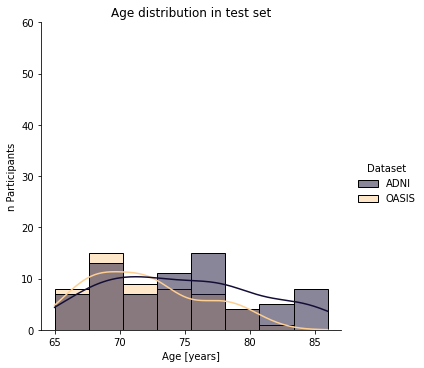

n =  70 mean age =  74.74 5.8
Bias between chronological age and BPAD eliminated: True (r = -0.08557614670188833 p = 0.4811940464996568 )


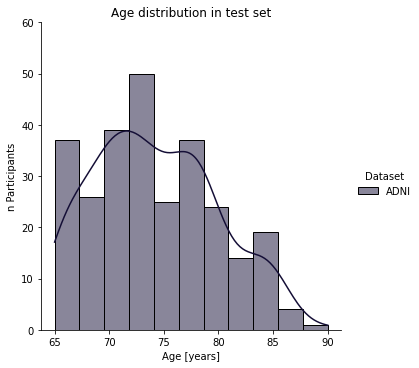

Cross-validating...
done.
Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.946523777494337, R2: 0.8120766166292941


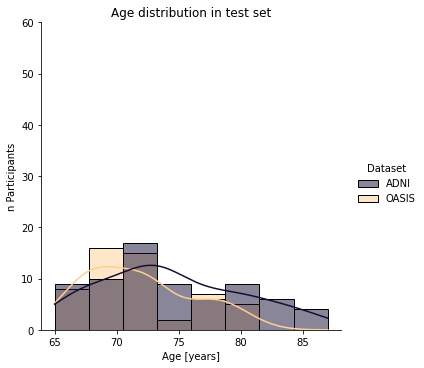

n =  70 mean age =  74.33 5.69
Bias between chronological age and BPAD eliminated: True (r = 0.16565669211892617 p = 0.17052531369146914 )


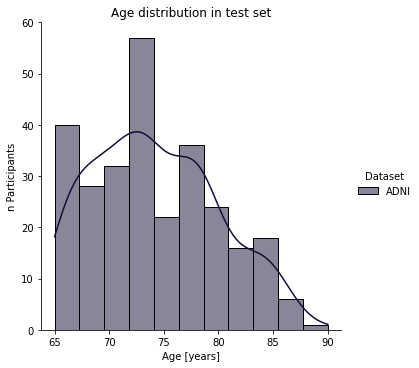

Cross-validating...
done.
Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.7568575222135525, R2: 0.6471677276800006


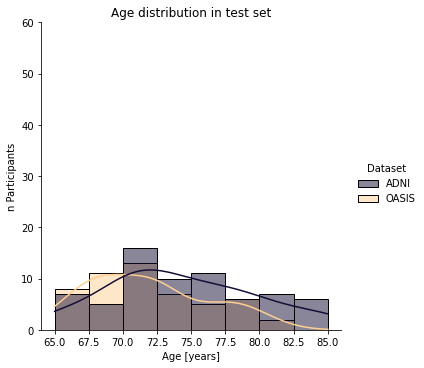

Kernel not linear, no weight coefficients available.
n =  68 mean age =  74.31 5.34
Bias between chronological age and BPAD eliminated: False (r = -0.2538187620777077 p = 0.03674603030897004 )


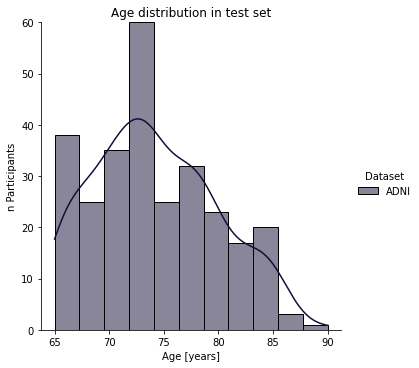

Cross-validating...
done.
Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6845875142845932, R2: 0.8625074999402136


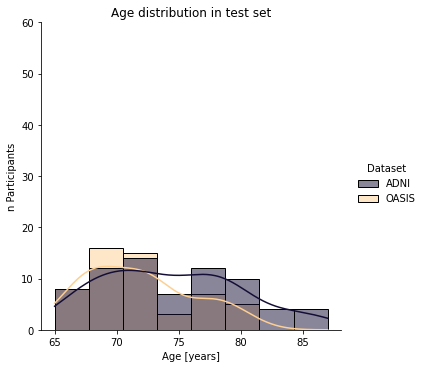

n =  71 mean age =  74.42 5.56
Bias between chronological age and BPAD eliminated: True (r = 0.14467788346406585 p = 0.2286729186577257 )


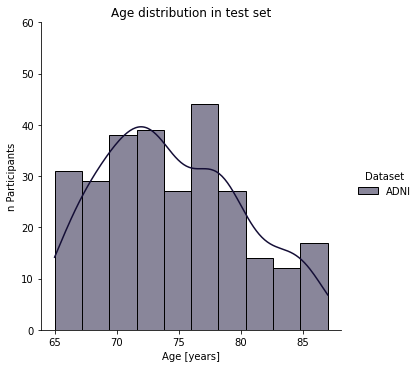

Cross-validating...
done.
Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.5854666833998994, R2: 0.8727038319893166


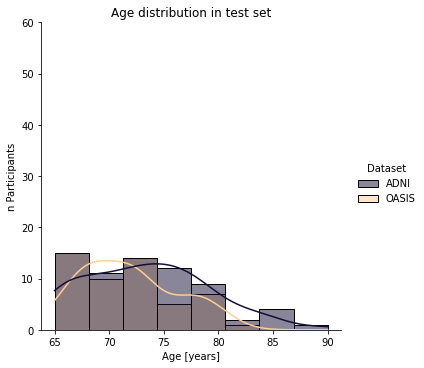

n =  68 mean age =  73.41 5.66
Bias between chronological age and BPAD eliminated: True (r = 0.16232923726654083 p = 0.1859767314974394 )
---TEST---
   Round       MAE        R2  Mean diff Model
0      0  1.884206  0.841051   0.627690   svm
1      1  1.898389  0.840521  -0.345420   svm
2      2  2.439231  0.676274  -0.633529   rvr
3      3  1.286659  0.905613  -0.118585   svm
4      4  1.552302  0.883710  -0.201765   svm
          Round       MAE        R2  Mean diff
count  5.000000  5.000000  5.000000   5.000000
mean   2.000000  1.812157  0.829434  -0.134322
std    1.581139  0.432875  0.090090   0.468836
min    0.000000  1.286659  0.676274  -0.633529
25%    1.000000  1.552302  0.840521  -0.345420
50%    2.000000  1.884206  0.841051  -0.201765
75%    3.000000  1.898389  0.883710  -0.118585
max    4.000000  2.439231  0.905613   0.627690


In [2]:
main("predict ADNI CN", modality, rand_seed=0)

## Validation of brain age prediction in cognitively normal individuals from OASIS

In [2]:
main("predict OASIS CN", modality)

---OASIS-PET---
n =  52 mean age =  71.81 4.26
Bias between chronological age and BPAD eliminated: True (r = 0.05662145972375508 p = 0.6901158652449282 )
Bias between chronological age and BPAD eliminated: True (r = 0.17564480646734507 p = 0.21294330646491413 )
Bias between chronological age and BPAD eliminated: True (r = 0.138544565514635 p = 0.32732946918202654 )
Bias between chronological age and BPAD eliminated: True (r = 0.17293227542035763 p = 0.22020614838588395 )
Bias between chronological age and BPAD eliminated: True (r = 0.1803314424711112 p = 0.20079317420225098 )

---BAGGED RESULTS---
MAE:  1.673836686542758 
R2 Score:  0.7546059574535418 
Mean error:  -0.7685980368185744

---RESULTS ACROSS MODELS---
        MAE        R2  mean_diff
0  1.669515  0.733029  -0.475828
1  1.747171  0.703986  -1.010584
2  2.154173  0.612585  -0.735616
3  1.521822  0.767169  -0.932416
4  1.601700  0.759366  -0.688545
            MAE        R2  mean_diff
count  5.000000  5.000000   5.000000
mean 

## Assessment of brain age in subjective cognitive impairment patients from DELCODE

In [3]:
main("predict DELCODE SCD", modality)

---DELCODE-PET---
n =  76 mean age =  72.3 4.57
Bias between chronological age and BPAD eliminated: False (r = -0.23751083782683644 p = 0.038836215711682796 )
Bias between chronological age and BPAD eliminated: True (r = -0.1522441727175541 p = 0.18921480466152266 )
Bias between chronological age and BPAD eliminated: True (r = -0.1293440377175833 p = 0.26545393426162245 )
Bias between chronological age and BPAD eliminated: True (r = -0.13772671379876777 p = 0.23544921330830787 )
Bias between chronological age and BPAD eliminated: True (r = -0.13490123699795112 p = 0.24528788798557014 )

---BAGGED RESULTS---
MAE:  2.0587150948114736 
R2 Score:  0.6938239901351013 
Mean error:  1.4794042568232413

---RESULTS ACROSS MODELS---
        MAE        R2  mean_diff
0  2.129572  0.678208   1.708260
1  1.834316  0.761603   1.036372
2  2.965181  0.291215   1.802900
3  1.841644  0.760120   1.405502
4  1.923683  0.733452   1.443988
            MAE        R2  mean_diff
count  5.000000  5.000000   5.00

## Assessment of brain age in mild cognitive impairment patients from ADNI

In [4]:
main("predict ADNI MCI", modality)

---ADNI-PET---
n =  513 mean age =  74.95 5.78
Bias between chronological age and BPAD eliminated: True (r = -0.02335320888250471 p = 0.5976935010753615 )
n =  513 mean age =  74.95 5.78
Bias between chronological age and BPAD eliminated: False (r = 0.11426320819972512 p = 0.009592576483076876 )
n =  513 mean age =  74.95 5.78
Bias between chronological age and BPAD eliminated: True (r = 0.002010910999782651 p = 0.9637605226251298 )
n =  513 mean age =  74.95 5.78
Bias between chronological age and BPAD eliminated: False (r = 0.10783696810797112 p = 0.014540523167364422 )
n =  513 mean age =  74.95 5.78
Bias between chronological age and BPAD eliminated: False (r = 0.13701538186822862 p = 0.0018680788291780199 )

---BAGGED RESULTS---
MAE:  1.8259749339411044 
R2 Score:  0.8504001377163042 
Mean error:  0.6674197494357327

---RESULTS ACROSS MODELS---
        MAE        R2  mean_diff
0  1.965395  0.826013   0.879588
1  1.849506  0.839207   0.496532
2  2.521644  0.710155   0.704721
3  1.6

## Association with cognitive performance in CN
First predict age for all CN (excluding outliers) in cross-validated manner, then correlate with test scores and pathology.

In [5]:
main(5.1, modality)

## Association with neuropathology in CN

In [6]:
main(5.2, modality)

## Association with cognitive performance in MCI

In [7]:
main(5.3, modality)

Model BAGGED


## Association with neuropathology in MCI

In [8]:
main(5.4, modality)

Model BAGGED
